In [13]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

import matplotlib.pyplot as plt, mpld3

import datetime

#import cosima_cookbook as cc

In [6]:
path="/g/data/v45/jm5970/trackeddy_out/output/"
eke_time=[]
for ii in range(306,345):
    try:
        ekefield=Dataset(path+'EKE_eddy'+str(ii)+'.nc')
        eke=ekefield.variables['EKE_eddy']
        for tt in range(0,shape(eke)[0]):
            eke_time.append(mean(eke[tt,:,:]))
    except:
        print('Dataset not Found.')
        reconstruct=Dataset(path+'reconstructed_field_'+str(ii)+'.nc')
        time=reconstruct.variables['time']
        for tt in range(0,len(time)):
            eke_time.append(np.nan)

Dataset not Found.
Dataset not Found.


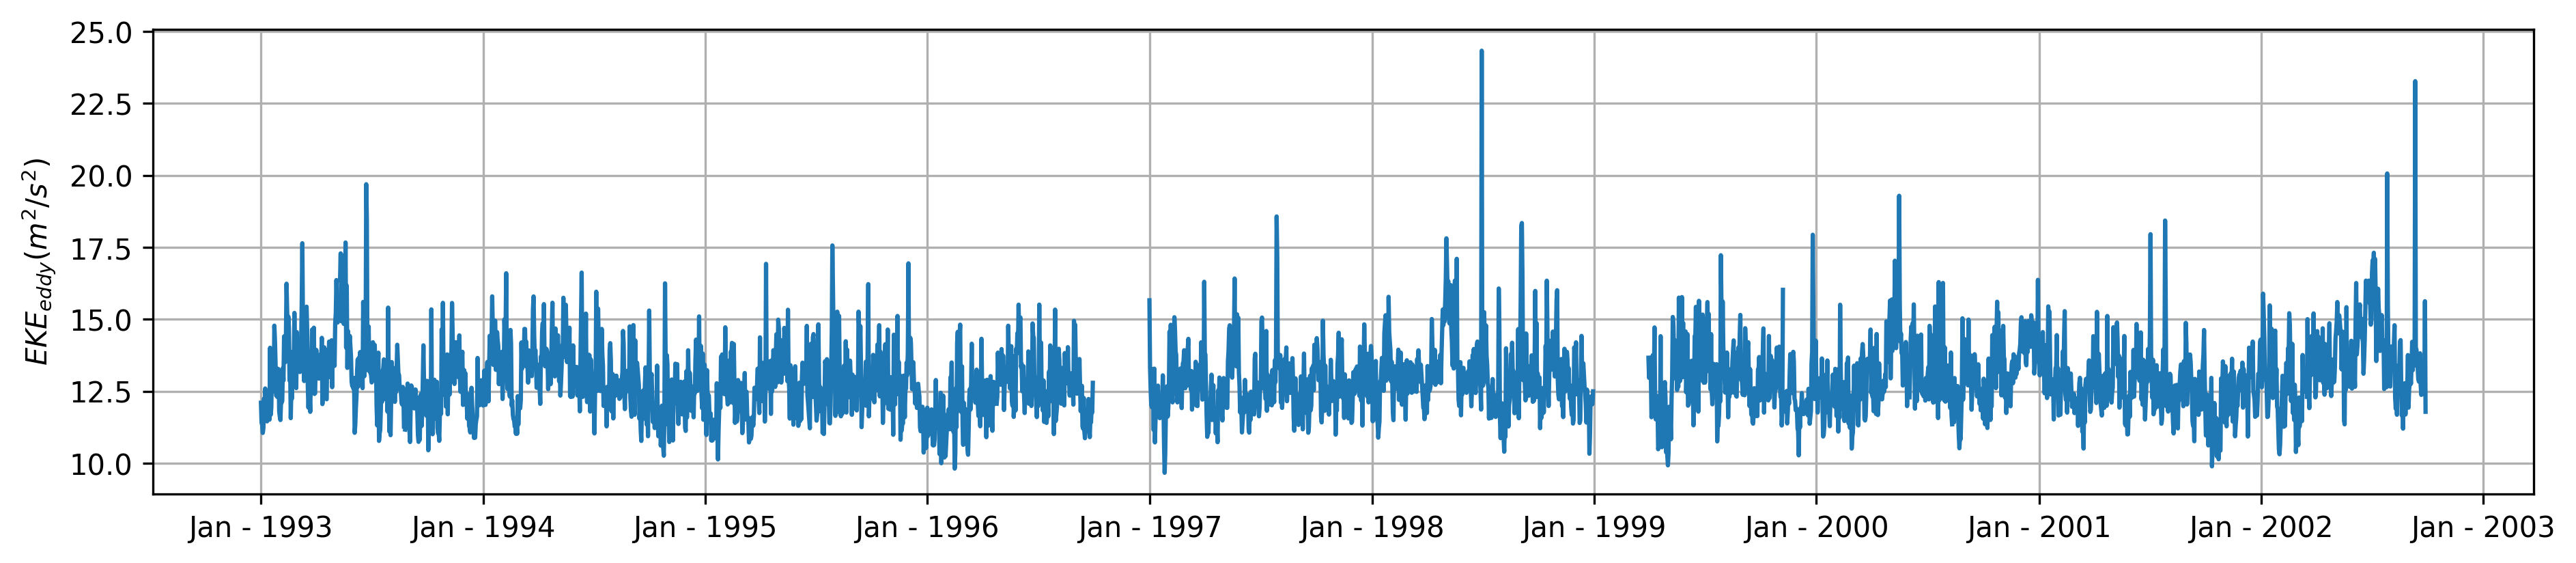

In [19]:
eke_time=asarray(eke_time)
eke_time[eke_time<5]=np.nan


base = datetime.datetime(1993, 1, 1, 0, 0)
date_list = [base + datetime.timedelta(days=x) for x in range(0, len(eke_time))]

fig, ax = plt.subplots(figsize=(15,3),dpi=300)
monthsFmt = DateFormatter("%b - %Y")
ax.xaxis.set_major_formatter(monthsFmt)
ax.grid(True)
ax.set_ylabel(r'$EKE_{eddy} (m^2/s^2)$')
ax.plot(date_list,eke_time)